In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

In [3]:
csharp_dataset_base = pd.read_csv('/content/drive/MyDrive/machine learning/Datasets/GeneratedDataset_CSharp.csv', sep=';', encoding='iso-8859-1')

FE_csharp_dataset = csharp_dataset_base[csharp_dataset_base.DataSet == "feature_envy"]
LM_csharp_dataset = csharp_dataset_base[csharp_dataset_base.DataSet == "long_method"]
DC_csharp_dataset = csharp_dataset_base[csharp_dataset_base.DataSet == "data_class"]

#Other csharp Dataset
other_csharp_dataset = pd.concat([FE_csharp_dataset, LM_csharp_dataset, DC_csharp_dataset], axis=0)

#Dataset to be tested
csharp_dataset = csharp_dataset_base[csharp_dataset_base.DataSet == "large_class"]

In [4]:
import warnings
warnings.filterwarnings("ignore")

## **PREDICTOR AND TARGET ATTRIBUTES**

In [5]:
# csharp Dataset
csharp_dataset_features = [8,9,10,11,12,13,14,15,16,17,18,21,22,24,26,28,30,36,49,50,51,52,53,54,55]

other_csharp_binary_predictors = other_csharp_dataset.iloc[:, csharp_dataset_features].values
csharp_binary_predictors = csharp_dataset.iloc[:, csharp_dataset_features].values

other_csharp_multiclass_predictors = other_csharp_dataset.iloc[:, csharp_dataset_features].values
csharp_multiclass_predictors = csharp_dataset.iloc[:, csharp_dataset_features].values

other_csharp_binary_targets = other_csharp_dataset.iloc[:, 5].values
csharp_binary_targets = csharp_dataset.iloc[:, 5].values

other_csharp_multiclass_targets = other_csharp_dataset.iloc[:, 7].values
csharp_multiclass_targets = csharp_dataset.iloc[:, 7].values

# **Binary Code Smell Detection**

In [6]:
pip install seaborn

In [7]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 10.2 MB/s eta 0:00:00


              precision    recall  f1-score   support

           0       0.91      0.96      0.93       175
           1       0.86      0.72      0.79        61

    accuracy                           0.90       236
   macro avg       0.89      0.84      0.86       236
weighted avg       0.90      0.90      0.90       236



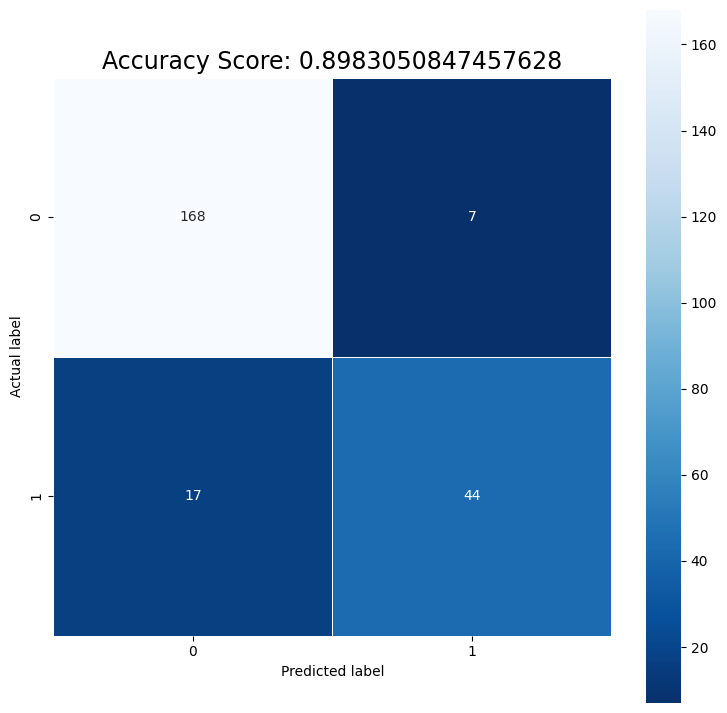

In [8]:
#predictors_array = predictors_chi_original
r = 42
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Other csharp Test and Train Dataset
x_train_other_csharp_binary, x_test_other_csharp_binary, y_train_other_csharp_binary, y_test_other_csharp_binary = train_test_split(other_csharp_binary_predictors, other_csharp_binary_targets, test_size = 0.3, random_state = r)
x_train_other_csharp_multiclass, x_test_other_csharp_multiclass, y_train_other_csharp_multiclass, y_test_other_csharp_multiclass = train_test_split(other_csharp_multiclass_predictors, other_csharp_multiclass_targets, test_size = 0.3, random_state = r)

# csharp Test and Train Dataset
x_train_csharp_binary, x_test_csharp_binary, y_train_csharp_binary, y_test_csharp_binary = train_test_split(csharp_binary_predictors, csharp_binary_targets, test_size = 0.3, random_state = r)
x_train_csharp_multiclass, x_test_csharp_multiclass, y_train_csharp_multiclass, y_test_csharp_multiclass = train_test_split(csharp_multiclass_predictors, csharp_multiclass_targets, test_size = 0.3, random_state = r)

# Combine csharp Training Dataset
x_train_csharp_binary = np.concatenate([x_train_other_csharp_binary, x_train_csharp_binary], axis=0)
y_train_csharp_binary = np.concatenate([y_train_other_csharp_binary, y_train_csharp_binary], axis=0)
x_train_csharp_multiclass = np.concatenate([x_train_other_csharp_multiclass, x_train_csharp_multiclass], axis=0)
y_train_csharp_multiclass = np.concatenate([y_train_other_csharp_multiclass, y_train_csharp_multiclass], axis=0)

# Create a StandardScaler instance for binary and multiclass
from sklearn.preprocessing import StandardScaler
scaler_binary = StandardScaler()
scaler_multiclass = StandardScaler()

# Fit the scaler to the training data and transform the training data
x_train_csharp_binary = scaler_binary.fit_transform(x_train_csharp_binary)
x_train_csharp_multiclass = scaler_multiclass.fit_transform(x_train_csharp_multiclass)

# Transform the test data using the adjusted scaler
x_test_csharp_binary = scaler_binary.transform(x_test_csharp_binary)
x_test_csharp_multiclass = scaler_multiclass.transform(x_test_csharp_multiclass)

# Define the detector model
detector = CatBoostClassifier(task_type='CPU', random_state = 42, verbose=False,
                              auto_class_weights='Balanced', bootstrap_type='MVS', border_count=251, depth=10, feature_border_type='GreedyLogSum',
                              grow_policy='SymmetricTree', iterations=915, l2_leaf_reg=7, leaf_estimation_method='Newton', learning_rate=0.5)

detector.fit(x_train_csharp_binary, y_train_csharp_binary)

predictions_detector = detector.predict(x_test_csharp_binary)

cm = confusion_matrix(y_test_csharp_binary, predictions_detector)

print(classification_report(y_test_csharp_binary, predictions_detector))

score = detector.score(x_test_csharp_binary, y_test_csharp_binary)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 17)
#plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       175
           1       0.87      0.79      0.83        61

    accuracy                           0.92       236
   macro avg       0.90      0.87      0.89       236
weighted avg       0.91      0.92      0.91       236



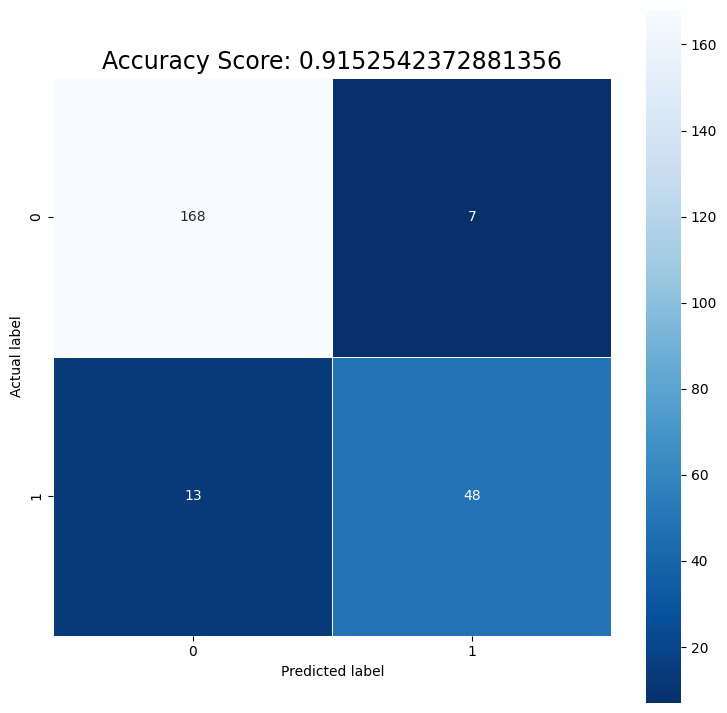

In [9]:
#predictors_array = predictors_chi_original
r = 42
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Other csharp Test and Train Dataset
x_train_other_csharp_binary, x_test_other_csharp_binary, y_train_other_csharp_binary, y_test_other_csharp_binary = train_test_split(other_csharp_binary_predictors, other_csharp_binary_targets, test_size = 0.3, random_state = r)
x_train_other_csharp_multiclass, x_test_other_csharp_multiclass, y_train_other_csharp_multiclass, y_test_other_csharp_multiclass = train_test_split(other_csharp_multiclass_predictors, other_csharp_multiclass_targets, test_size = 0.3, random_state = r)

# csharp Test and Train Dataset
x_train_csharp_binary, x_test_csharp_binary, y_train_csharp_binary, y_test_csharp_binary = train_test_split(csharp_binary_predictors, csharp_binary_targets, test_size = 0.3, random_state = r)
x_train_csharp_multiclass, x_test_csharp_multiclass, y_train_csharp_multiclass, y_test_csharp_multiclass = train_test_split(csharp_multiclass_predictors, csharp_multiclass_targets, test_size = 0.3, random_state = r)

# Combine csharp Training Dataset
x_train_csharp_binary = np.concatenate([x_train_other_csharp_binary, x_train_csharp_binary], axis=0)
y_train_csharp_binary = np.concatenate([y_train_other_csharp_binary, y_train_csharp_binary], axis=0)
x_train_csharp_multiclass = np.concatenate([x_train_other_csharp_multiclass, x_train_csharp_multiclass], axis=0)
y_train_csharp_multiclass = np.concatenate([y_train_other_csharp_multiclass, y_train_csharp_multiclass], axis=0)

# Create a StandardScaler instance for binary and multiclass
from sklearn.preprocessing import StandardScaler
scaler_binary = StandardScaler()
scaler_multiclass = StandardScaler()

# Fit the scaler to the training data and transform the training data
x_train_csharp_binary = scaler_binary.fit_transform(x_train_csharp_binary)
x_train_csharp_multiclass = scaler_multiclass.fit_transform(x_train_csharp_multiclass)

# Transform the test data using the adjusted scaler
x_test_csharp_binary = scaler_binary.transform(x_test_csharp_binary)
x_test_csharp_multiclass = scaler_multiclass.transform(x_test_csharp_multiclass)

# OverSampling
from imblearn.over_sampling import BorderlineSMOTE
sm = BorderlineSMOTE(random_state=42)
x_train_csharp_binary, y_train_csharp_binary = sm.fit_resample(x_train_csharp_binary, y_train_csharp_binary)

# Define the detector model
detector = CatBoostClassifier(task_type='CPU', random_state = 42, verbose=False,
                              auto_class_weights='Balanced', bootstrap_type='MVS', border_count=251, depth=10, feature_border_type='GreedyLogSum',
                              grow_policy='SymmetricTree', iterations=915, l2_leaf_reg=7, leaf_estimation_method='Newton', learning_rate=0.5)

detector.fit(x_train_csharp_binary, y_train_csharp_binary)

predictions_detector = detector.predict(x_test_csharp_binary)

cm = confusion_matrix(y_test_csharp_binary, predictions_detector)

print(classification_report(y_test_csharp_binary, predictions_detector))

score = detector.score(x_test_csharp_binary, y_test_csharp_binary)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 17)
#plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       175
           1       0.82      0.75      0.79        61

    accuracy                           0.89       236
   macro avg       0.87      0.85      0.86       236
weighted avg       0.89      0.89      0.89       236



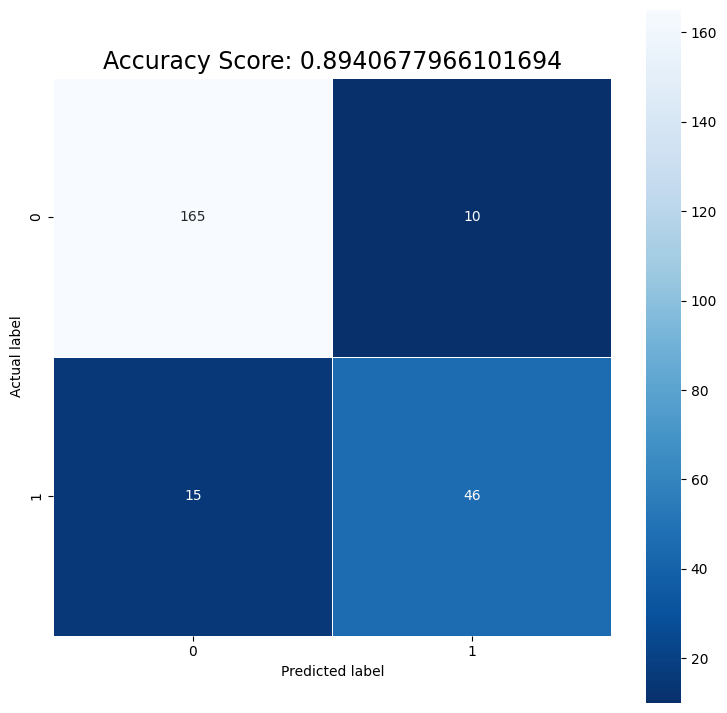

In [10]:
#predictors_array = predictors_chi_original
r = 42
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Other csharp Test and Train Dataset
x_train_other_csharp_binary, x_test_other_csharp_binary, y_train_other_csharp_binary, y_test_other_csharp_binary = train_test_split(other_csharp_binary_predictors, other_csharp_binary_targets, test_size = 0.3, random_state = r)
x_train_other_csharp_multiclass, x_test_other_csharp_multiclass, y_train_other_csharp_multiclass, y_test_other_csharp_multiclass = train_test_split(other_csharp_multiclass_predictors, other_csharp_multiclass_targets, test_size = 0.3, random_state = r)

# csharp Test and Train Dataset
x_train_csharp_binary, x_test_csharp_binary, y_train_csharp_binary, y_test_csharp_binary = train_test_split(csharp_binary_predictors, csharp_binary_targets, test_size = 0.3, random_state = r)
x_train_csharp_multiclass, x_test_csharp_multiclass, y_train_csharp_multiclass, y_test_csharp_multiclass = train_test_split(csharp_multiclass_predictors, csharp_multiclass_targets, test_size = 0.3, random_state = r)

# Combine csharp Training Dataset
x_train_csharp_binary = np.concatenate([x_train_other_csharp_binary, x_train_csharp_binary], axis=0)
y_train_csharp_binary = np.concatenate([y_train_other_csharp_binary, y_train_csharp_binary], axis=0)
x_train_csharp_multiclass = np.concatenate([x_train_other_csharp_multiclass, x_train_csharp_multiclass], axis=0)
y_train_csharp_multiclass = np.concatenate([y_train_other_csharp_multiclass, y_train_csharp_multiclass], axis=0)

# Create a StandardScaler instance for binary and multiclass
from sklearn.preprocessing import StandardScaler
scaler_binary = StandardScaler()
scaler_multiclass = StandardScaler()

# Fit the scaler to the training data and transform the training data
x_train_csharp_binary = scaler_binary.fit_transform(x_train_csharp_binary)
x_train_csharp_multiclass = scaler_multiclass.fit_transform(x_train_csharp_multiclass)

# Transform the test data using the adjusted scaler
x_test_csharp_binary = scaler_binary.transform(x_test_csharp_binary)
x_test_csharp_multiclass = scaler_multiclass.transform(x_test_csharp_multiclass)

# OverSampling
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_train_csharp_binary, y_train_csharp_binary = sm.fit_resample(x_train_csharp_binary, y_train_csharp_binary)

# Define the detector model
detector = CatBoostClassifier(task_type='CPU', random_state = 42, verbose=False,
                              auto_class_weights='Balanced', bootstrap_type='MVS', border_count=251, depth=10, feature_border_type='GreedyLogSum',
                              grow_policy='SymmetricTree', iterations=915, l2_leaf_reg=7, leaf_estimation_method='Newton', learning_rate=0.5)

detector.fit(x_train_csharp_binary, y_train_csharp_binary)

predictions_detector = detector.predict(x_test_csharp_binary)

cm = confusion_matrix(y_test_csharp_binary, predictions_detector)

print(classification_report(y_test_csharp_binary, predictions_detector))

score = detector.score(x_test_csharp_binary, y_test_csharp_binary)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 17)
#plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

# **Exclude instances of no-smell from the training and test sets**


In [11]:
# Find unique classes
unique_classes = np.unique(y_test_csharp_multiclass)

# Count the number of classes
number_classes = len(unique_classes)

if (number_classes > 3):

  x_train_multiclass, y_train_multiclass = x_train_csharp_multiclass, y_train_csharp_multiclass

  finish = False
  while (finish == False):
    try:
      max = x_train_multiclass.shape[0]
      # Exclude instances of no-smell from the training set (targets)
      for i in range(0, max):
        if (y_train_multiclass[i] == 0):
          y_train_multiclass = np.delete(y_train_multiclass, i, axis = 0)
          x_train_multiclass = np.delete(x_train_multiclass, i, axis = 0)
          i = 0
          max = max - 1
      finish = True
      print("The deletion is over in the y_train set!")
    except:
      finish == False

  x_test_multiclass, y_test_multiclass = x_test_csharp_multiclass, y_test_csharp_multiclass
  finish = False
  while (finish == False):
    try:
      max = x_test_multiclass.shape[0]
      # Exclude instances of no-smell from the test set (predictors)
      for i in range(0, max):
        if (y_test_multiclass[i] == 0):
          y_test_multiclass = np.delete(y_test_multiclass, i, axis = 0)
          x_test_multiclass = np.delete(x_test_multiclass, i, axis = 0)
          i = 0
          max = max - 1
      finish = True
      print("The deletion is over in the x_train set!")
    except:
      finish = False

  # Original mapping -> Remapping
  mapping = {1.0: 0.0, 2.0: 1.0, 3.0: 2.0, 4.0: 3.0, 5.0: 4.0, 6.0: 5.0, 7.0: 6.0, 8.0: 7.0, 9.0: 8.0, 10.0: 9.0, 11.0: 10.0, 12.0: 11.0}

  y_train_multiclass = np.array([mapping[label] for label in y_train_multiclass])
  y_test_multiclass = np.array([mapping[label] for label in y_test_multiclass])
  print("Prepare training and test set for applying XGBoost")

The deletion is over in the y_train set!
The deletion is over in the x_train set!
Prepare training and test set for applying XGBoost


# **Code Smell Severity Classification with three ensemble method**


# **RANDOM FOREST**

# **Oversampling BorderlineSMOTE**

In [12]:
pip install imbalanced-learn

# **Randomized**

              precision    recall  f1-score   support

         6.0       0.00      0.00      0.00         0
         9.0       0.80      0.97      0.88        34
        10.0       0.75      0.60      0.67        20
        11.0       1.00      0.43      0.60         7

    accuracy                           0.79        61
   macro avg       0.64      0.50      0.54        61
weighted avg       0.81      0.79      0.78        61



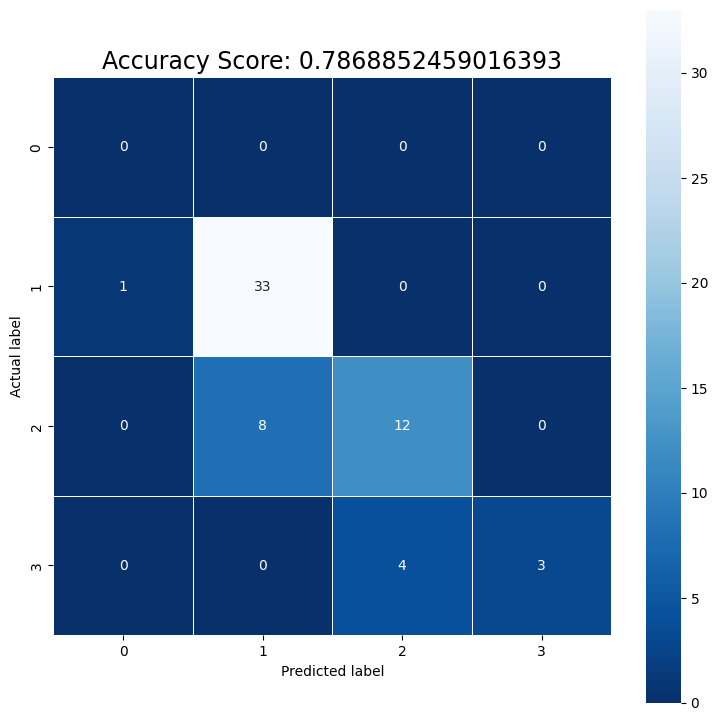

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the classifier model
classifier = RandomForestClassifier(random_state=42, n_estimators=970, min_samples_split=7, min_samples_leaf=3, max_features=None, max_depth=6,
                                    criterion='log_loss', bootstrap=True)

classifier.fit(x_train_multiclass, y_train_multiclass)

predictions_classifier = classifier.predict(x_test_multiclass)

cm = confusion_matrix(y_test_multiclass, predictions_classifier)

print(classification_report(y_test_multiclass, predictions_classifier))

score = classifier.score(x_test_multiclass, y_test_multiclass)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 17)
#plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

# **BorderlineSMOTE**

In [14]:
from imblearn.over_sampling import BorderlineSMOTE

# OverSampling
sm = BorderlineSMOTE(random_state=42)
x_train_multiclass_res, y_train_multiclass_res = sm.fit_resample(x_train_multiclass, y_train_multiclass)

              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         0
         6.0       0.00      0.00      0.00         0
         9.0       0.83      0.85      0.84        34
        10.0       0.62      0.50      0.56        20
        11.0       0.57      0.57      0.57         7

    accuracy                           0.70        61
   macro avg       0.41      0.38      0.39        61
weighted avg       0.73      0.70      0.72        61



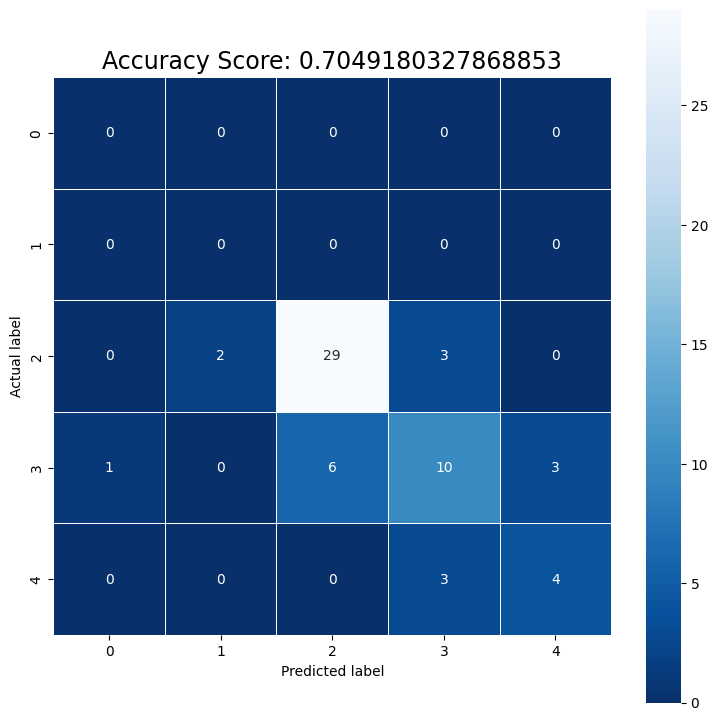

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the classifier model
classifier = RandomForestClassifier(random_state=42, n_estimators=118, min_samples_split=12, min_samples_leaf=3, max_features='sqrt', max_depth=9,
                                    criterion='gini', bootstrap=False)

classifier.fit(x_train_multiclass_res, y_train_multiclass_res)

predictions_classifier = classifier.predict(x_test_multiclass)

cm = confusion_matrix(y_test_multiclass, predictions_classifier)

print(classification_report(y_test_multiclass, predictions_classifier))

score = classifier.score(x_test_multiclass, y_test_multiclass)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 17)
#plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

## **SMOTE**

In [16]:
from imblearn.over_sampling import SMOTE

# OverSampling
sm = SMOTE(random_state=42, k_neighbors=1)
x_train_multiclass_res, y_train_multiclass_res = sm.fit_resample(x_train_multiclass, y_train_multiclass)

              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         0
         6.0       0.00      0.00      0.00         0
         7.0       0.00      0.00      0.00         0
         9.0       0.84      0.79      0.82        34
        10.0       0.68      0.65      0.67        20
        11.0       0.80      0.57      0.67         7

    accuracy                           0.72        61
   macro avg       0.39      0.34      0.36        61
weighted avg       0.79      0.72      0.75        61



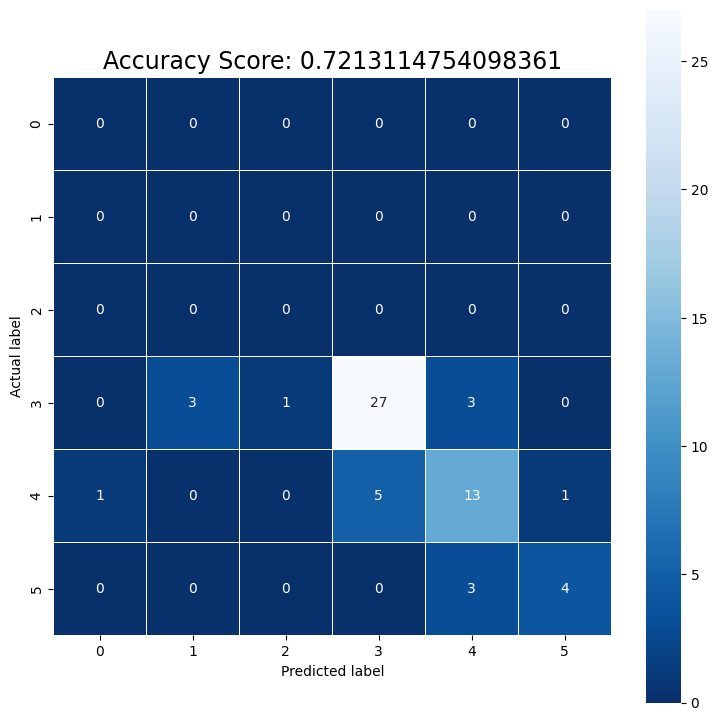

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the classifier model
classifier = RandomForestClassifier(random_state=42, n_estimators=416, min_samples_split=8, min_samples_leaf=1, max_features='log2', max_depth=6,
                                    criterion='log_loss', bootstrap=False)

classifier.fit(x_train_multiclass_res, y_train_multiclass_res)

predictions_classifier = classifier.predict(x_test_multiclass)

cm = confusion_matrix(y_test_multiclass, predictions_classifier)

print(classification_report(y_test_multiclass, predictions_classifier))

score = classifier.score(x_test_multiclass, y_test_multiclass)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 17)
#plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

# **EXTREME GRADIENTE BOOSTING (XGBOOST)**

# **Randomized**

              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         0
         6.0       0.00      0.00      0.00         0
         9.0       0.81      0.85      0.83        34
        10.0       0.61      0.55      0.58        20
        11.0       0.80      0.57      0.67         7

    accuracy                           0.72        61
   macro avg       0.44      0.39      0.41        61
weighted avg       0.74      0.72      0.73        61



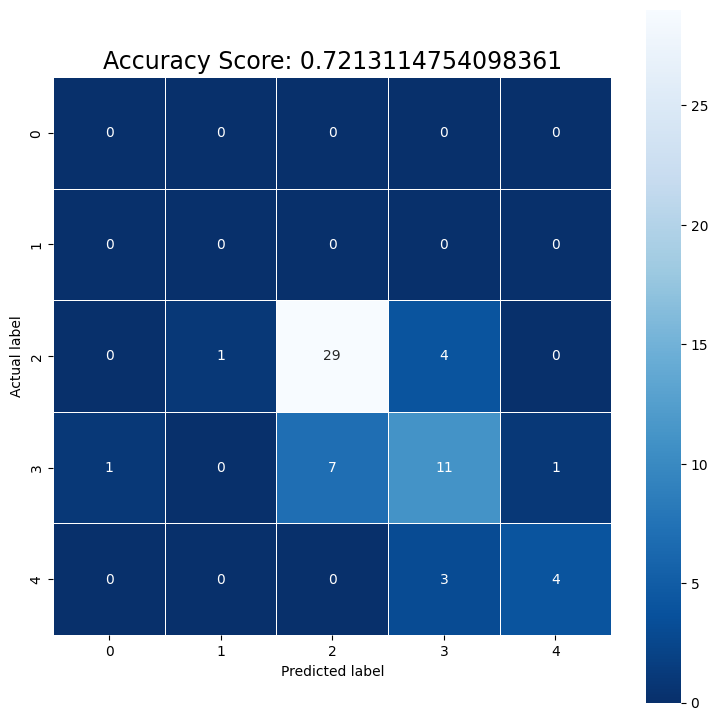

In [18]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Original mapping -> Remapping
mapping = {0.0: 0.0, 1.0: 1.0, 3.0: 2.0, 4.0: 3.0, 5.0: 4.0, 6.0: 5.0, 7.0: 6.0, 9.0: 7.0, 10.0: 8.0, 11.0: 9.0}

y_train_multiclass_remapped = np.array([mapping[label] for label in y_train_multiclass])
y_test_multiclass_remapped = np.array([mapping[label] for label in y_test_multiclass])

# Define the classifier model
classifier = XGBClassifier(num_class=12, random_state=42, tree_method='hist', objective='multi:softmax', n_estimators=786, max_depth=5,
                           learning_rate=0.11137931034482758, grow_policy='lossguide', booster='dart')

classifier.fit(x_train_multiclass, y_train_multiclass_remapped)

predictions_classifier = classifier.predict(x_test_multiclass)

# Remapping -> Original mapping
re_mapping = {0.0: 0.0, 1.0: 1.0, 2.0: 3.0, 3.0: 4.0, 4.0: 5.0, 5.0: 6.0, 6.0: 7.0, 7.0: 9.0, 8.0: 10.0, 9.0: 11.0}
predictions_classifier_remapped = np.array([re_mapping[label] for label in predictions_classifier])

cm = confusion_matrix(y_test_multiclass, predictions_classifier_remapped)

print(classification_report(y_test_multiclass, predictions_classifier_remapped))

score = classifier.score(x_test_multiclass, y_test_multiclass_remapped)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 17)
#plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

# **BorderlineSMOTE**

In [19]:
from imblearn.over_sampling import BorderlineSMOTE

# OverSampling
sm = BorderlineSMOTE(random_state=42)
x_train_multiclass_res, y_train_multiclass_res = sm.fit_resample(x_train_multiclass, y_train_multiclass)

              precision    recall  f1-score   support

         6.0       0.00      0.00      0.00         0
         9.0       0.83      0.74      0.78        34
        10.0       0.52      0.55      0.54        20
        11.0       0.43      0.43      0.43         7

    accuracy                           0.64        61
   macro avg       0.45      0.43      0.44        61
weighted avg       0.69      0.64      0.66        61



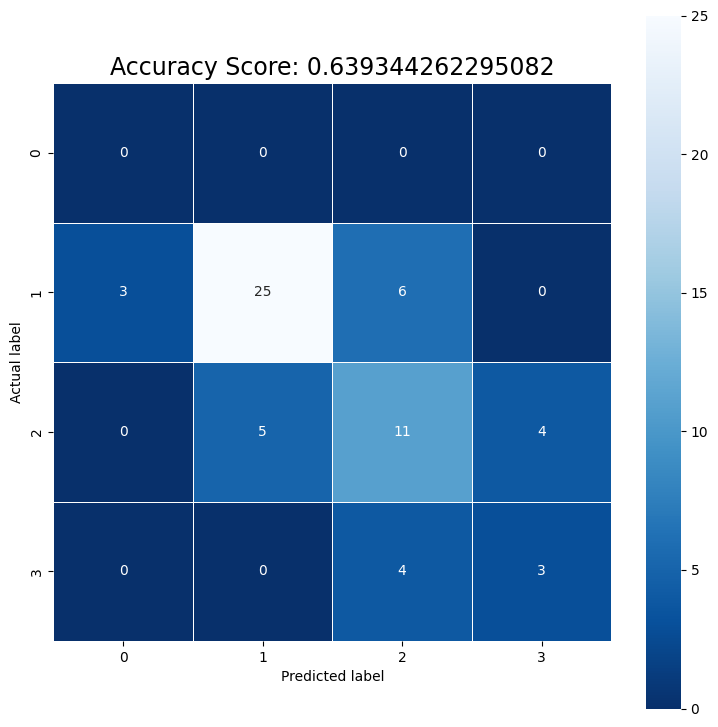

In [20]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Original mapping -> Remapping
mapping = {0.0: 0.0, 1.0: 1.0, 3.0: 2.0, 4.0: 3.0, 5.0: 4.0, 6.0: 5.0, 7.0: 6.0, 9.0: 7.0, 10.0: 8.0, 11.0: 9.0}

y_train_multiclass_remapped = np.array([mapping[label] for label in y_train_multiclass_res])
y_test_multiclass_remapped = np.array([mapping[label] for label in y_test_multiclass])

# Define the classifier model
classifier = XGBClassifier(num_class=12, random_state=42, tree_method='hist', objective='multi:softprob', n_estimators=164, max_depth=1,
                           learning_rate=0.48310344827586205, grow_policy='lossguide', booster='dart')

classifier.fit(x_train_multiclass_res, y_train_multiclass_remapped)

predictions_classifier = classifier.predict(x_test_multiclass)

# Remapping -> Original mapping
re_mapping = {0.0: 0.0, 1.0: 1.0, 2.0: 3.0, 3.0: 4.0, 4.0: 5.0, 5.0: 6.0, 6.0: 7.0, 7.0: 9.0, 8.0: 10.0, 9.0: 11.0}
predictions_classifier_remapped = np.array([re_mapping[label] for label in predictions_classifier])

cm = confusion_matrix(y_test_multiclass, predictions_classifier_remapped)

print(classification_report(y_test_multiclass, predictions_classifier_remapped))

score = classifier.score(x_test_multiclass, y_test_multiclass_remapped)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 17)
#plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

## **SMOTE**

In [21]:
from imblearn.over_sampling import SMOTE

# OverSampling
sm = SMOTE(random_state=42, k_neighbors=1)
x_train_multiclass_res, y_train_multiclass_res = sm.fit_resample(x_train_multiclass, y_train_multiclass)

              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         0
         6.0       0.00      0.00      0.00         0
         7.0       0.00      0.00      0.00         0
         9.0       0.82      0.82      0.82        34
        10.0       0.67      0.60      0.63        20
        11.0       0.80      0.57      0.67         7

    accuracy                           0.72        61
   macro avg       0.38      0.33      0.35        61
weighted avg       0.77      0.72      0.74        61



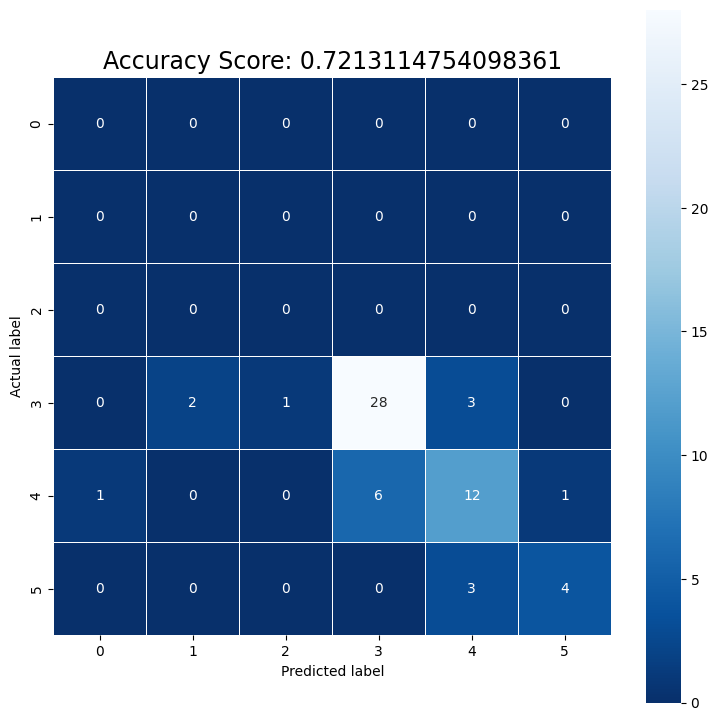

In [22]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Original mapping -> Remapping
mapping = {0.0: 0.0, 1.0: 1.0, 3.0: 2.0, 4.0: 3.0, 5.0: 4.0, 6.0: 5.0, 7.0: 6.0, 9.0: 7.0, 10.0: 8.0, 11.0: 9.0}

y_train_multiclass_remapped = np.array([mapping[label] for label in y_train_multiclass_res])
y_test_multiclass_remapped = np.array([mapping[label] for label in y_test_multiclass])

# Define the classifier model
classifier = XGBClassifier(num_class=12, random_state=42, tree_method='approx', objective='multi:softmax', n_estimators=852, max_depth=4,
                           learning_rate=0.19586206896551722, grow_policy='depthwise', booster='dart')

classifier.fit(x_train_multiclass_res, y_train_multiclass_remapped)

predictions_classifier = classifier.predict(x_test_multiclass)

# Remapping -> Original mapping
re_mapping = {0.0: 0.0, 1.0: 1.0, 2.0: 3.0, 3.0: 4.0, 4.0: 5.0, 5.0: 6.0, 6.0: 7.0, 7.0: 9.0, 8.0: 10.0, 9.0: 11.0}
predictions_classifier_remapped = np.array([re_mapping[label] for label in predictions_classifier])

cm = confusion_matrix(y_test_multiclass, predictions_classifier_remapped)

print(classification_report(y_test_multiclass, predictions_classifier_remapped))

score = classifier.score(x_test_multiclass, y_test_multiclass_remapped)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 17)
#plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

# **CATEGORICAL BOOSTING (CATBOOST)**

In [23]:
pip install catboost

# **Randomized**

Found only 10 unique classes in the data, but have defined 12 classes. Probably something is wrong with data.


              precision    recall  f1-score   support

         6.0       0.00      0.00      0.00         0
         9.0       0.82      0.94      0.88        34
        10.0       0.72      0.65      0.68        20
        11.0       1.00      0.43      0.60         7

    accuracy                           0.79        61
   macro avg       0.64      0.50      0.54        61
weighted avg       0.81      0.79      0.78        61



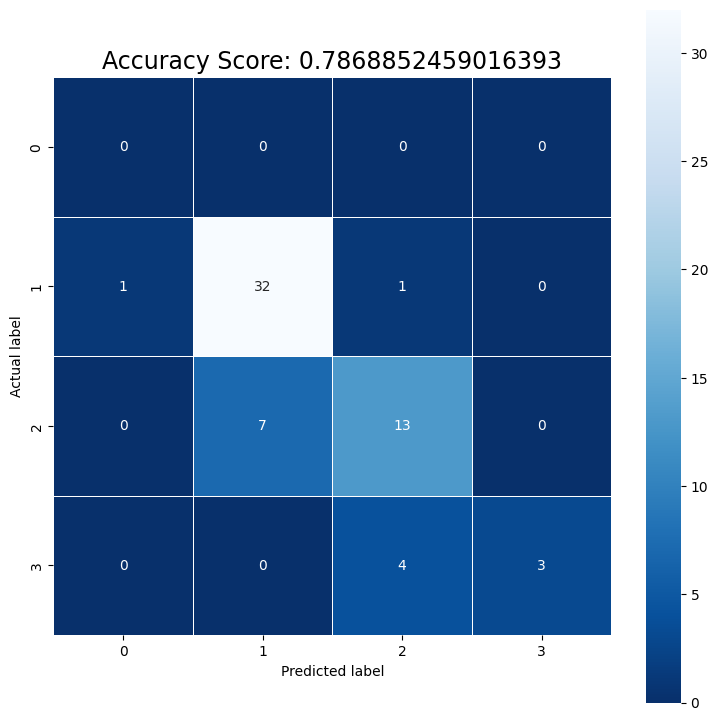

In [24]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the classifier model
classifier = CatBoostClassifier(task_type='CPU', random_state = 42, verbose=False, classes_count=12, objective='MultiClass',
                                learning_rate=0.04379310344827586, leaf_estimation_method='Newton', l2_leaf_reg=8, iterations=354, grow_policy='Lossguide',
                                feature_border_type='MaxLogSum', depth=6, border_count=96, bootstrap_type='No', auto_class_weights='SqrtBalanced')

classifier.fit(x_train_multiclass, y_train_multiclass)

predictions_classifier = classifier.predict(x_test_multiclass)

cm = confusion_matrix(y_test_multiclass, predictions_classifier)

print(classification_report(y_test_multiclass, predictions_classifier))

score = classifier.score(x_test_multiclass, y_test_multiclass)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 17)
#plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

# **BorderlineSMOTE**

In [25]:
from imblearn.over_sampling import BorderlineSMOTE

# OverSampling
sm = BorderlineSMOTE(random_state=42)
x_train_multiclass_res, y_train_multiclass_res = sm.fit_resample(x_train_multiclass, y_train_multiclass)

Found only 10 unique classes in the data, but have defined 12 classes. Probably something is wrong with data.


              precision    recall  f1-score   support

         6.0       0.00      0.00      0.00         0
         9.0       0.78      0.74      0.76        34
        10.0       0.44      0.40      0.42        20
        11.0       0.38      0.43      0.40         7

    accuracy                           0.59        61
   macro avg       0.40      0.39      0.39        61
weighted avg       0.62      0.59      0.61        61



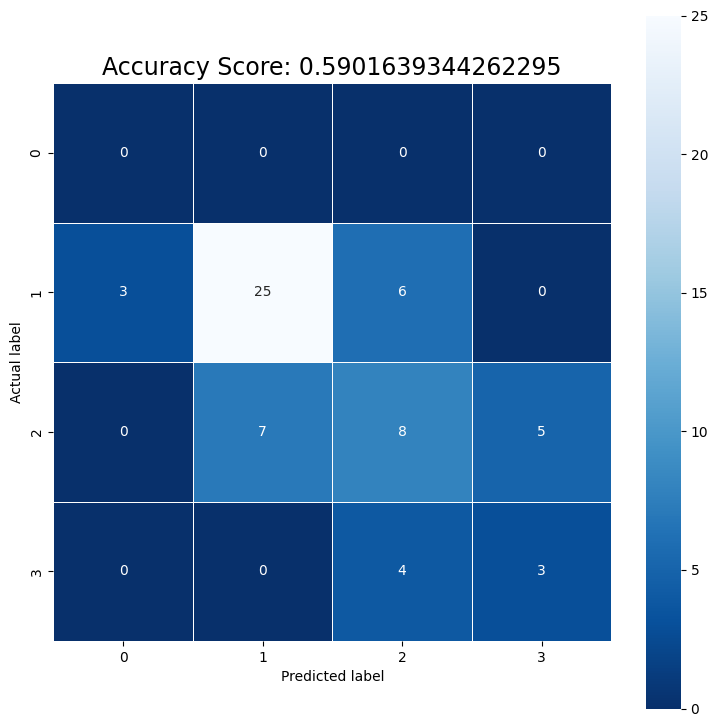

In [26]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the classifier model
classifier = CatBoostClassifier(task_type='CPU', random_state = 42, verbose=False, classes_count=12, objective='MultiClass',
                                learning_rate=0.3986206896551724, leaf_estimation_method='Newton', l2_leaf_reg=7, iterations=396, grow_policy='Depthwise',
                                feature_border_type='UniformAndQuantiles', depth=15, border_count=128, bootstrap_type='Bernoulli', auto_class_weights='SqrtBalanced')

classifier.fit(x_train_multiclass_res, y_train_multiclass_res)

predictions_classifier = classifier.predict(x_test_multiclass)

cm = confusion_matrix(y_test_multiclass, predictions_classifier)

print(classification_report(y_test_multiclass, predictions_classifier))

score = classifier.score(x_test_multiclass, y_test_multiclass)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 17)
#plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

In [27]:
from imblearn.over_sampling import SMOTE

# OverSampling
sm = SMOTE(random_state=42, k_neighbors=1)
x_train_multiclass_res, y_train_multiclass_res = sm.fit_resample(x_train_multiclass, y_train_multiclass)

Found only 10 unique classes in the data, but have defined 12 classes. Probably something is wrong with data.


              precision    recall  f1-score   support

         6.0       0.00      0.00      0.00         0
         7.0       0.00      0.00      0.00         0
         9.0       0.78      0.82      0.80        34
        10.0       0.65      0.55      0.59        20
        11.0       0.80      0.57      0.67         7

    accuracy                           0.70        61
   macro avg       0.44      0.39      0.41        61
weighted avg       0.74      0.70      0.72        61



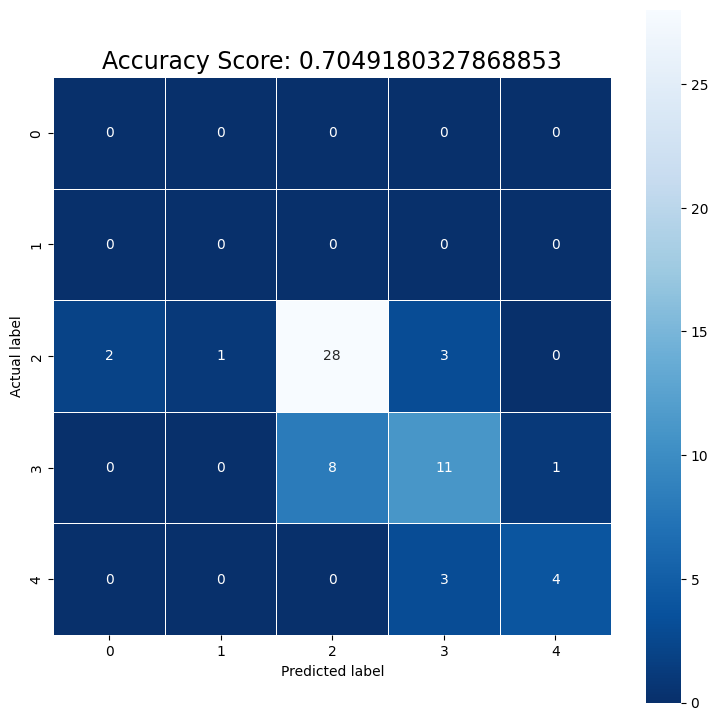

In [28]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the classifier model
classifier = CatBoostClassifier(task_type='CPU', random_state = 42, verbose=False, classes_count=12, objective='MultiClass',
                                learning_rate=0.3479310344827586, leaf_estimation_method='Gradient', l2_leaf_reg=5, iterations=910, grow_policy='Lossguide',
                                feature_border_type='Uniform', depth=12, border_count=192, bootstrap_type='Bayesian', auto_class_weights='Balanced')

classifier.fit(x_train_multiclass_res, y_train_multiclass_res)

predictions_classifier = classifier.predict(x_test_multiclass)

cm = confusion_matrix(y_test_multiclass, predictions_classifier)

print(classification_report(y_test_multiclass, predictions_classifier))

score = classifier.score(x_test_multiclass, y_test_multiclass)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 17)
#plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()